<a href="https://colab.research.google.com/github/Taex3/Python_For_Invest/blob/master/Beta_predict_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mplfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 2.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import mplfinance as mpf
import yfinance as yf
import matplotlib.pyplot as plt


In [4]:
data = yf.download('AAPL', start='2018-01-01', end='2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
df = data.copy()


In [6]:
df['sma_short'] = df.Close.rolling(24).mean()
df['sma_long'] = df.Close.rolling(52).mean()

In [7]:
sma_short = mpf.make_addplot(df['sma_short'], color='orange')
sma_long = mpf.make_addplot(df['sma_long'], color='y')

In [8]:
sma_list = [sma_short, sma_long]

/usr/local/lib/python3.9/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


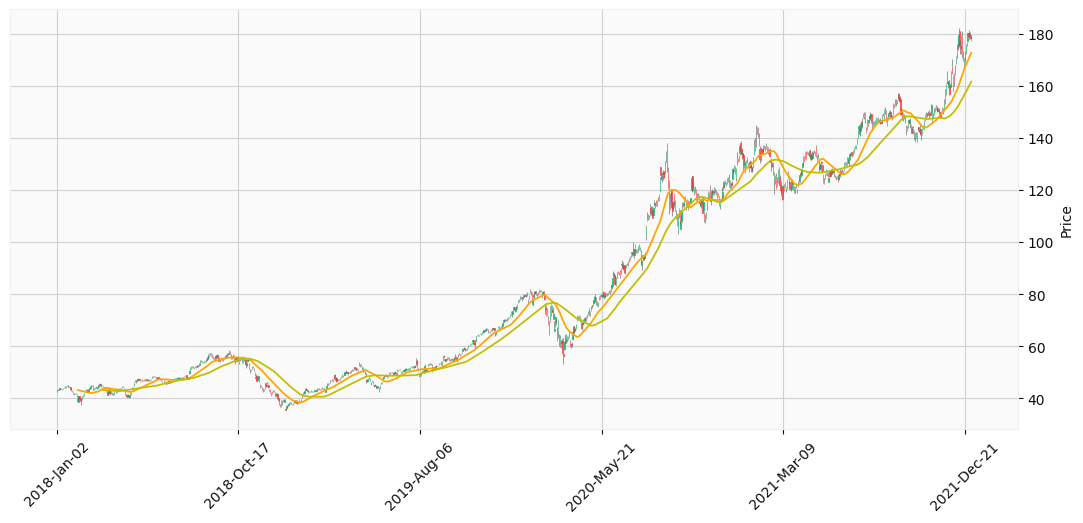

In [9]:
mpf.plot(df,style='yahoo', type='candle', addplot = sma_list, figsize=(14,6))


In [10]:
df


,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long
Date,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888081,102223600,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880951,118071600,NaN,NaN
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070835,89738400,NaN,NaN
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538441,94640000,NaN,NaN
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384155,82271200,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.016113,74919600,169.601667,158.933078
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.983673,79144300,170.362917,159.671155
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.073044,62348900,171.111667,160.356155


In [11]:
df['trend'] = df['sma_short'] > df['sma_long']


In [12]:
df


,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend
Date,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888081,102223600,NaN,NaN,False
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880951,118071600,NaN,NaN,False
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070835,89738400,NaN,NaN,False
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538441,94640000,NaN,NaN,False
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384155,82271200,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.016113,74919600,169.601667,158.933078,True
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.983673,79144300,170.362917,159.671155,True
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.073044,62348900,171.111667,160.356155,True


In [13]:
df['trend_shift'] = df.trend.shift(1)


In [14]:
df


,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift
Date,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888081,102223600,NaN,NaN,False,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880951,118071600,NaN,NaN,False,False
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070835,89738400,NaN,NaN,False,False
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538441,94640000,NaN,NaN,False,False
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384155,82271200,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.016113,74919600,169.601667,158.933078,True,True
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.983673,79144300,170.362917,159.671155,True,True
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.073044,62348900,171.111667,160.356155,True,True


In [15]:
df.loc[(df.trend == True) & (df.trend_shift == False),'action'] = 'buy'
df.loc[(df.trend == False) & (df.trend_shift == True),'action'] = 'sell'

In [16]:
df


,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action
Date,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888081,102223600,NaN,NaN,False,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880951,118071600,NaN,NaN,False,False,NaN
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070835,89738400,NaN,NaN,False,False,NaN
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538441,94640000,NaN,NaN,False,False,NaN
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384155,82271200,NaN,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.016113,74919600,169.601667,158.933078,True,True,NaN
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.983673,79144300,170.362917,159.671155,True,True,NaN
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.073044,62348900,171.111667,160.356155,True,True,NaN


In [21]:
df[df.action == 'buy']


,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2018-03-16,44.662498,44.779999,44.404999,44.505001,42.427559,157618800,43.746771,43.137981,True,False,buy,42.184749
2018-05-10,46.935001,47.592499,46.912498,47.509998,45.292286,111957200,43.475625,43.473318,True,False,buy,44.566874
2018-07-27,48.747501,48.797501,47.525002,47.744999,45.691841,96096000,47.267813,47.247404,True,False,buy,45.148751
2019-02-14,42.427502,42.814999,42.345001,42.700001,41.326660,87342800,40.543437,40.507308,True,False,buy,40.227751
2019-07-05,50.837502,51.270000,50.724998,51.057499,49.605663,69062000,48.669792,48.604904,True,False,buy,48.188749
2020-05-04,72.292503,73.422501,71.580002,73.290001,71.861259,133568000,68.298229,67.957932,True,False,buy,68.001002
2020-11-10,115.550003,117.589996,114.129997,115.970001,114.419670,138023400,116.279584,116.091105,True,False,buy,108.423497
2021-04-21,132.360001,133.750000,131.300003,133.500000,131.912155,68847100,126.915000,126.843461,True,False,buy,124.735003
2021-06-30,136.169998,137.410004,135.869995,136.960007,135.560867,63261400,129.540833,129.425192,True,False,buy,129.076495


In [19]:
df[df.action == 'sell']


,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2018-04-20,42.650002,42.805000,41.357498,41.430000,39.496098,261964400,42.852709,43.017692,False,True,sell,44.945250
2018-07-16,47.880001,48.162498,47.605000,47.727501,45.675083,60172400,46.894271,46.924567,False,True,sell,50.570623
2018-11-01,54.762501,55.590000,54.202499,55.555000,53.352436,233292800,55.225729,55.269664,False,True,sell,58.369500
2019-05-29,44.105000,44.837502,44.000000,44.345001,43.084042,113924800,48.640729,48.765048,False,True,sell,47.079377
2020-03-09,65.937500,69.522499,65.750000,66.542503,65.245285,286744800,76.504895,76.617884,False,True,sell,72.998624
2020-10-07,114.620003,115.550003,114.129997,115.080002,113.346016,96849000,113.608333,114.250528,False,True,sell,121.327503
2021-03-03,124.809998,125.709999,121.839996,122.059998,120.608215,112966300,130.963333,131.652885,False,True,sell,131.995499
2021-06-01,125.080002,125.349998,123.940002,124.279999,123.010384,67637100,127.436667,127.688654,False,True,sell,131.617498
2021-10-05,139.490005,142.240005,139.360001,141.110001,139.877716,80861100,147.388749,147.654615,False,True,sell,149.352006


In [22]:
df.loc[df['action'] == 'buy', 'marker_position'] = df['Low'] *0.95
df.loc[df['action'] == 'sell', 'marker_position'] = df['High'] *1.05

In [23]:
df[df.marker_position.notnull()]


,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2018-03-16,44.662498,44.779999,44.404999,44.505001,42.427559,157618800,43.746771,43.137981,True,False,buy,42.184749
2018-04-20,42.650002,42.805000,41.357498,41.430000,39.496098,261964400,42.852709,43.017692,False,True,sell,44.945250
2018-05-10,46.935001,47.592499,46.912498,47.509998,45.292286,111957200,43.475625,43.473318,True,False,buy,44.566874
2018-07-16,47.880001,48.162498,47.605000,47.727501,45.675083,60172400,46.894271,46.924567,False,True,sell,50.570623
2018-07-27,48.747501,48.797501,47.525002,47.744999,45.691841,96096000,47.267813,47.247404,True,False,buy,45.148751
2018-11-01,54.762501,55.590000,54.202499,55.555000,53.352436,233292800,55.225729,55.269664,False,True,sell,58.369500
2019-02-14,42.427502,42.814999,42.345001,42.700001,41.326660,87342800,40.543437,40.507308,True,False,buy,40.227751
2019-05-29,44.105000,44.837502,44.000000,44.345001,43.084042,113924800,48.640729,48.765048,False,True,sell,47.079377
2019-07-05,50.837502,51.270000,50.724998,51.057499,49.605663,69062000,48.669792,48.604904,True,False,buy,48.188749


In [24]:
b = df.loc[df.action == 'buy']

s = df.loc[df.action == 'sell']

In [25]:
b

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2018-03-16,44.662498,44.779999,44.404999,44.505001,42.427559,157618800,43.746771,43.137981,True,False,buy,42.184749
2018-05-10,46.935001,47.592499,46.912498,47.509998,45.292286,111957200,43.475625,43.473318,True,False,buy,44.566874
2018-07-27,48.747501,48.797501,47.525002,47.744999,45.691841,96096000,47.267813,47.247404,True,False,buy,45.148751
2019-02-14,42.427502,42.814999,42.345001,42.700001,41.326660,87342800,40.543437,40.507308,True,False,buy,40.227751
2019-07-05,50.837502,51.270000,50.724998,51.057499,49.605663,69062000,48.669792,48.604904,True,False,buy,48.188749
2020-05-04,72.292503,73.422501,71.580002,73.290001,71.861259,133568000,68.298229,67.957932,True,False,buy,68.001002
2020-11-10,115.550003,117.589996,114.129997,115.970001,114.419670,138023400,116.279584,116.091105,True,False,buy,108.423497
2021-04-21,132.360001,133.750000,131.300003,133.500000,131.912155,68847100,126.915000,126.843461,True,False,buy,124.735003
2021-06-30,136.169998,137.410004,135.869995,136.960007,135.560867,63261400,129.540833,129.425192,True,False,buy,129.076495


In [26]:
s

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,trend,trend_shift,action,marker_position
Date,,,,,,,,,,,,
2018-04-20,42.650002,42.805000,41.357498,41.430000,39.496098,261964400,42.852709,43.017692,False,True,sell,44.945250
2018-07-16,47.880001,48.162498,47.605000,47.727501,45.675083,60172400,46.894271,46.924567,False,True,sell,50.570623
2018-11-01,54.762501,55.590000,54.202499,55.555000,53.352436,233292800,55.225729,55.269664,False,True,sell,58.369500
2019-05-29,44.105000,44.837502,44.000000,44.345001,43.084042,113924800,48.640729,48.765048,False,True,sell,47.079377
2020-03-09,65.937500,69.522499,65.750000,66.542503,65.245285,286744800,76.504895,76.617884,False,True,sell,72.998624
2020-10-07,114.620003,115.550003,114.129997,115.080002,113.346016,96849000,113.608333,114.250528,False,True,sell,121.327503
2021-03-03,124.809998,125.709999,121.839996,122.059998,120.608215,112966300,130.963333,131.652885,False,True,sell,131.995499
2021-06-01,125.080002,125.349998,123.940002,124.279999,123.010384,67637100,127.436667,127.688654,False,True,sell,131.617498
2021-10-05,139.490005,142.240005,139.360001,141.110001,139.877716,80861100,147.388749,147.654615,False,True,sell,149.352006


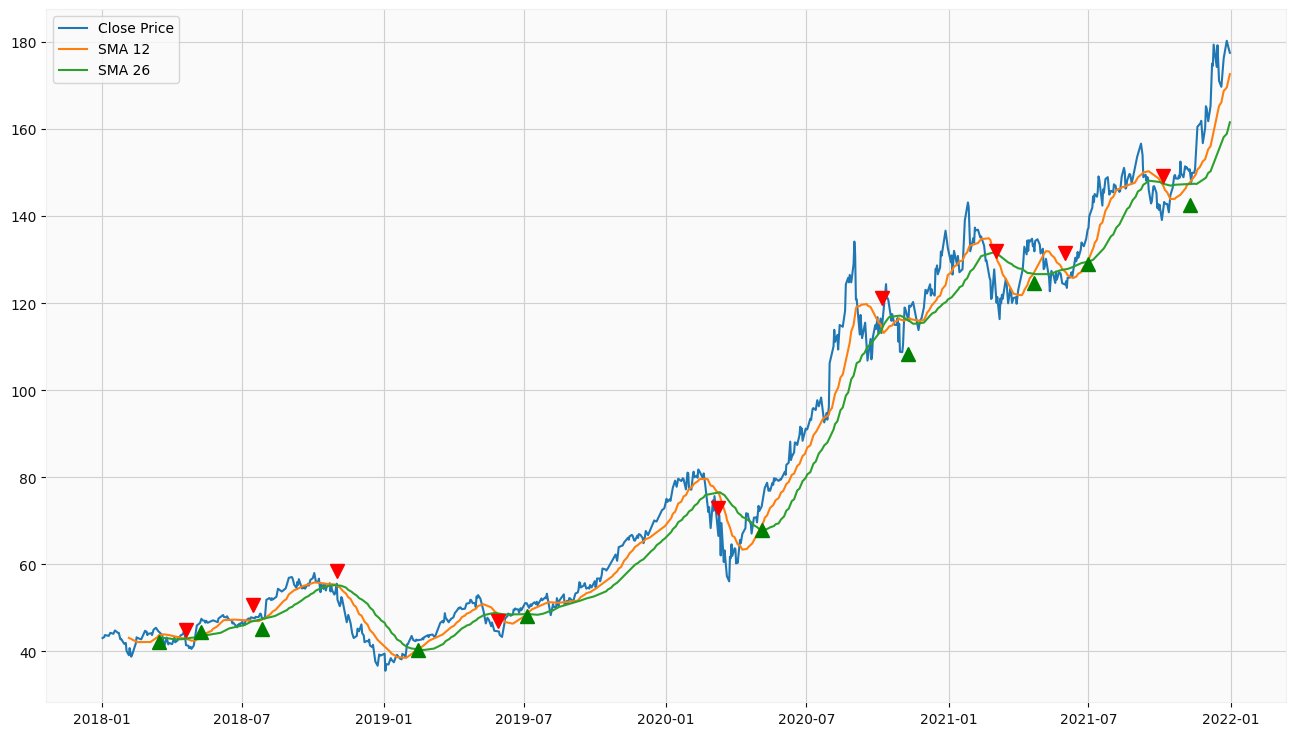

In [27]:
plt.figure(figsize=(16,9))
plt.plot(df.Close, label='Close Price')
plt.plot(df.sma_short, label='SMA 12')
plt.plot(df.sma_long, label='SMA 26')
plt.plot(b.marker_position, 'g^', markersize=10)
plt.plot(s.marker_position, 'rv', markersize=10)
plt.legend()

Make the prediction


In [28]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [29]:
df.dropna(subset=["sma_short","sma_long"],inplace=True)
df.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
sma_short            0
sma_long             0
trend                0
trend_shift          0
action             938
marker_position    938
dtype: int64

In [30]:
X = df[["Open","High","Low","Volume","sma_short","sma_long"]]
y = df["Close"]
df.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
sma_short            0
sma_long             0
trend                0
trend_shift          0
action             938
marker_position    938
dtype: int64

In [31]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2 , shuffle=False,random_state = 42)

In [32]:
model = RandomForestRegressor(n_estimators=100,random_state=0)
model.fit(train_x,train_y)

RandomForestRegressor(random_state=0)

In [33]:
pred_y = model.predict(test_x)


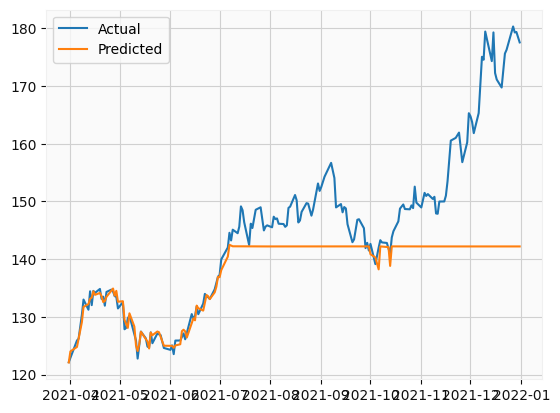

In [34]:
# Plot the predicted vs. actual stock prices
plt.plot(test_y.index, test_y.values, label='Actual')
plt.plot(test_y.index, pred_y, label='Predicted')
plt.legend()
plt.show()

In [35]:
# Calculate the Mean Squared Error (MSE) and R-squared
mse = metrics.mean_squared_error(test_y, pred_y)
r2 = metrics.r2_score(test_y, pred_y)

print(mse)
print(r2)

151.00301105136987
0.2542868289469673
